<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230901_%EC%9C%A0%EB%B9%84%EC%98%A8_%EB%A7%88%EC%BC%80%ED%8C%853%EA%B8%B0_%ED%95%9C%EC%88%98%EC%97%B0_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 분석 시나리오

Invistico_Airline 이라는 항공사는 항공기를 이용한 고객 대상으로 만족여부를 확인하였다.

Invistico_Airline은 포스트 코로나를 맞이하여 충성 고객의 선호도를 반영한 서비스 향상을 목표로 한다.

이를 위해 고객이 가장 중요시 여기는 서비스가 무엇인지 확인하고, 이를 개선하는 구체적인 방안을 마련하고자 한다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Invistico_Airline.csv")

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# satisfaction, customer type --> 0/1
def satisfaction_01(s):
  if s == "satisfied":
    return 1
  else:
    return 0

def customertype_01(c):
  if c == "Loyal Customer":
    return 1
  else:
    return 0


df['Satisfaction_01'] = df['satisfaction'].apply(satisfaction_01)
df['Customertype_01'] = df['Customer Type'].apply(customertype_01)
df = df.drop(['satisfaction', 'Customer Type'], axis = 1)
df
# Satisfaction_01 : 0이면 불만족, 1이면 만족
# Customertype_01 : 0이면 비충성 고객, 1이면 충성 고객

,Gender,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction_01,Customertype_01
0,Female,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,1,1
1,Male,47,Personal Travel,Business,2464,0,0,0,3,0,...,4,4,4,2,3,2,310,305.0,1,1
2,Female,15,Personal Travel,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,1,1
3,Female,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,1,1
4,Female,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,29,Personal Travel,Eco,1731,5,5,5,3,2,...,3,3,4,4,4,2,0,0.0,1,0
129876,Male,63,Personal Travel,Business,2087,2,3,2,4,2,...,2,3,3,1,2,1,174,172.0,0,0
129877,Male,69,Personal Travel,Eco,2320,3,0,3,3,3,...,4,3,4,2,3,2,155,163.0,0,0
129878,Male,66,Personal Travel,Eco,2450,3,2,3,2,3,...,3,2,3,2,1,2,193,205.0,0,0


In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction_01,Customertype_01
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129,0.547328,0.816908
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650,0.497757,0.386743
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,1.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000


In [ ]:
# 충성 / 비충성 고객에 따른 변수들의 평균 확인
df.groupby('Customertype_01').mean()

<ipython-input-10-d4419a435d48>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Customertype_01').mean()


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction_01
Customertype_01,,,,,,,,,,,,,,,,,,,
0,30.352565,2022.495837,2.712532,2.390454,2.703406,2.988982,3.044659,2.713162,3.005971,3.059378,3.235744,3.220648,3.694113,3.222708,3.700084,3.060723,15.024054,15.475415,0.239697
1,41.462008,1972.200349,2.866852,3.125165,2.885297,2.990745,3.294958,3.533713,3.634844,3.564609,3.516475,3.545353,3.696023,3.367276,3.707031,3.418002,14.644156,15.004973,0.616277


<Axes: >

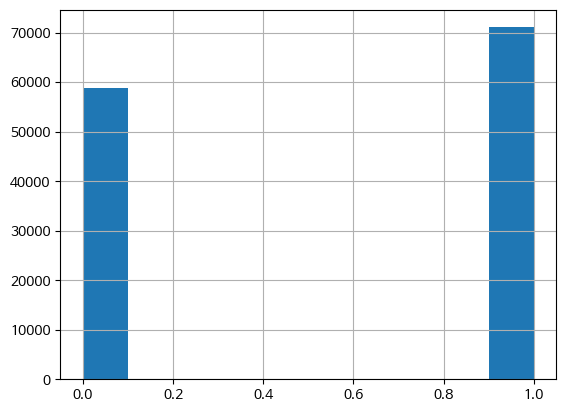

In [ ]:
df['Satisfaction_01'].hist()

<Axes: >

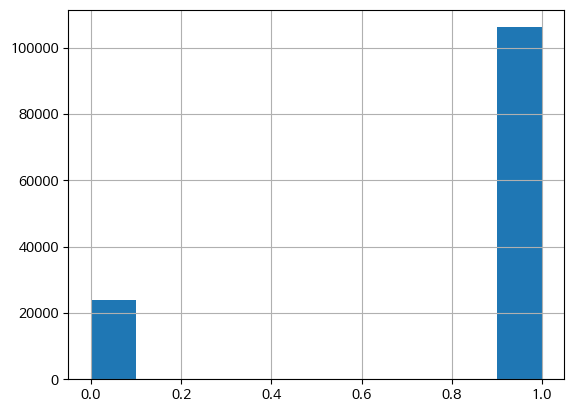

In [ ]:
df['Customertype_01'].hist()

In [ ]:
#결측치 제거
df.isnull().sum()

Gender                                 0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction_01                        0
Customertype_01                        0
dtype: int64

In [ ]:
df_na = df.dropna(axis = 0)
df = df_na

<Axes: >

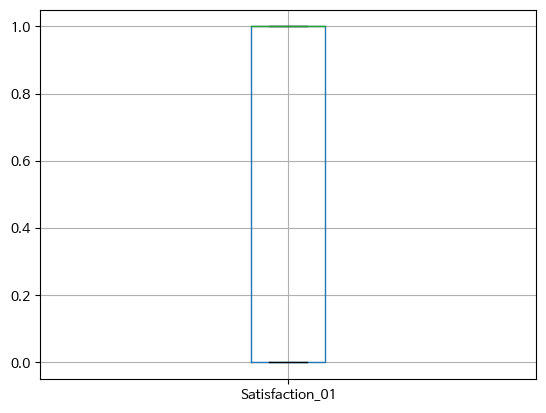

In [ ]:
# 이상치 확인

df.boxplot("Satisfaction_01")

In [ ]:
# 독립 변수 선택 : 일변량 통계기반 선택

from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(['Customertype_01', 'Satisfaction_01', 'Gender', 'Age', 'Type of Travel', 'Class'], axis = 1)
Y = df['Satisfaction_01']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

feat_sel = SelectKBest(chi2) #카이제곱으로 변수 선택
feat_sel.fit(X_train, Y_train)

print(feat_sel.scores_)
print(feat_sel.pvalues_) #0.05(p-value)보다 작은 값을 가진 변수들은 통계적으로 유의미한 변수
print(X_train.columns)
feat_score = pd.DataFrame()
feat_score['scores'] = feat_sel.scores_
feat_score['p-value'] = feat_sel.pvalues_
feat_score['feature'] = X_train.columns
feat_score['support'] = feat_sel.get_support()
feat_score

[7.75569101e+04 3.66543037e+03 1.39373257e+01 9.49380282e+02
 4.96456072e+00 2.47661230e+03 1.31552891e+04 6.62117631e+03
 8.30207576e+03 5.22066364e+03 4.07066814e+03 2.22783230e+03
 3.03387715e+03 2.17593112e+03 5.13672028e+03 4.86160152e+04
 5.90833206e+04]
[0.00000000e+000 0.00000000e+000 1.89007702e-004 1.80906807e-208
 2.58718859e-002 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000]
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


,scores,p-value,feature,support
0,77556.910099,0.000000e+00,Flight Distance,True
1,3665.430366,0.000000e+00,Seat comfort,True
2,13.937326,1.890077e-04,Departure/Arrival time convenient,False
3,949.380282,1.809068e-208,Food and drink,False
4,4.964561,2.587189e-02,Gate location,False
5,2476.612297,0.000000e+00,Inflight wifi service,False
6,13155.289087,0.000000e+00,Inflight entertainment,True
7,6621.176311,0.000000e+00,Online support,True
8,8302.075756,0.000000e+00,Ease of Online booking,True
9,5220.663642,0.000000e+00,On-board service,True


In [ ]:
df.columns

Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Satisfaction_01', 'Customertype_01'],
      dtype='object')

In [ ]:
# important_features : 통계적으로 유의미한 변수들
important_features = feat_score[feat_score['support'] == True]
important_features['feature']

# 조작이 가능한 변수를 최종적으로 선택 (seat comfort, leg room service, flight distance 제외)
# num = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
# cg = ['Inflight entertainment', 'Online support', 'Ease of Online booking'
# , 'On-board service',  'Online boarding']

0                Flight Distance
1                   Seat comfort
6         Inflight entertainment
7                 Online support
8         Ease of Online booking
9               On-board service
10              Leg room service
14               Online boarding
15    Departure Delay in Minutes
16      Arrival Delay in Minutes
Name: feature, dtype: object

In [ ]:
df.columns

Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Satisfaction_01', 'Customertype_01'],
      dtype='object')

In [ ]:
num = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
cg = ['Inflight entertainment', 'Online support', 'Ease of Online booking'
, 'On-board service', 'Online boarding']

In [ ]:
# 충성고객 중에서 독립변수 설정
X = df[df['Customertype_01'] == 1][num+cg]
X.head()

,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment,Online support,Ease of Online booking,On-board service,Online boarding
0,0,0.0,4,2,3,3,2
1,310,305.0,2,2,3,4,2
2,0,0.0,0,2,2,3,2
3,0,0.0,4,3,1,1,3
4,0,0.0,3,4,2,2,5


In [ ]:
# 충성고객 중에서 종속변수 설정
Y = df[df['Customertype_01'] ==1]['Satisfaction_01']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Satisfaction_01, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

        Departure Delay in Minutes  Arrival Delay in Minutes  \
73307                            0                       0.0   
108297                          39                      26.0   
9600                             0                       0.0   
7800                           117                     132.0   
3772                            22                      37.0   
...                            ...                       ...   
21324                            0                       0.0   
69623                           46                      40.0   
66340                            0                       0.0   
67296                            2                       0.0   
92066                           42                      31.0   

        Inflight entertainment  Online support  Ease of Online booking  \
73307                        4               3                       2   
108297                       5               4                       4   
9600     

In [ ]:
# 표준화, 원핫인코딩 : 컬럼트랜스포머
ct = ColumnTransformer([('scaling', StandardScaler(), num),('onehot', OneHotEncoder(sparse = False), cg)])

In [ ]:
ct.fit(X_train)
ct.fit(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['Departure Delay in Minutes',
                                  'Arrival Delay in Minutes']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['Inflight entertainment', 'Online support',
                                  'Ease of Online booking', 'On-board service',
                                  'Online boarding'])])

In [ ]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.382180,-0.386946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.635079,0.277931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.382180,-0.386946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.669598,2.988586,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.191658,0.559226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74036,-0.382180,-0.386946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74037,0.817664,0.635942,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74038,-0.382180,-0.386946,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74039,-0.330013,-0.386946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Y 분포 확인 -> 오버 샘플링 필요
Y_train.describe()

count    74041.000000
mean         0.616645
std          0.486207
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Satisfaction_01, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
smote = SMOTE(random_state = 0)

In [ ]:
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train)

In [ ]:
X_train_df= pd.DataFrame(X_train_over)
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.0,91314.000000,...,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000,91314.000000
mean,0.017259,0.015845,0.018443,0.089554,0.150448,0.201272,0.325122,0.215161,0.0,0.099359,...,0.144649,0.206967,0.308087,0.231444,0.000153,0.121577,0.151038,0.245708,0.268254,0.213269
std,1.022237,1.010233,0.134244,0.285199,0.357176,0.400684,0.468233,0.410758,0.0,0.298862,...,0.351417,0.404941,0.461510,0.421549,0.012381,0.326740,0.358018,0.430437,0.442977,0.409572
min,-0.382180,-0.386946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.382180,-0.386946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.382180,-0.386946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.043094,-0.028935,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,41.142871,40.119441,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Y_train_df= pd.DataFrame(Y_train_over)
Y_train_df.describe() # 이제 만족여부 mean 이 50:50비율로 맞춰짐

,Satisfaction_01
count,91314.000000
mean,0.500000
std,0.500003
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
Counter(Y_train_over)

Counter({0: 45657, 1: 45657})

In [ ]:
####### 머신러닝 위한 준비 완료 #######

#로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
lg_model = LogisticRegression(random_state = 0)

In [ ]:
lg_model.fit(X_train_over, Y_train_over)

LogisticRegression(random_state=0)

In [ ]:
Y_pred_lg = lg_model.predict(X_test)
print(Y_pred_lg)

[1 1 1 ... 0 1 1]


In [ ]:
# 베타값 확인
lg_model.coef_

array([[ 0.05740676, -0.26778609,  0.28440507, -1.12933506, -1.3414035 ,
        -1.3034193 ,  0.60936958,  2.47528349,  0.        ,  0.12972274,
        -0.03863209, -0.8197327 , -0.03327175,  0.35681409, -0.72109737,
        -1.21768913, -0.27152142, -0.00414941,  1.05392356,  0.75543405,
        -0.08571816, -0.60305139, -0.45784434, -0.38576076,  0.18560983,
         0.9416651 , -0.63537921, -0.0132836 , -0.15340545,  0.49177193,
        -0.07143479, -0.0233686 ]])

In [ ]:
cr_lg = classification_report(Y_test, Y_pred_lg)
print(cr_lg)

              precision    recall  f1-score   support

           0       0.74      0.84      0.78     12195
           1       0.89      0.81      0.85     19537

    accuracy                           0.82     31732
   macro avg       0.81      0.82      0.82     31732
weighted avg       0.83      0.82      0.82     31732



#KNN

In [ ]:
from sklearn.neighbors import

In [ ]:
kn_model = KNeighborsClassifier()

In [ ]:
kn_model.fit(X_train_over, Y_train_over)

KNeighborsClassifier()

In [ ]:
Y_pred_kn = kn_model.predict(X_test)

In [ ]:
cr_kn = classification_report(Y_test, Y_pred_kn)
print(cr_kn)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     12195
           1       0.90      0.88      0.89     19537

    accuracy                           0.86     31732
   macro avg       0.86      0.86      0.86     31732
weighted avg       0.87      0.86      0.87     31732



#DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train_over, Y_train_over)

DecisionTreeClassifier()

In [ ]:
Y_pred_dt = dt_model.predict(X_test)

In [ ]:
cr_dt = classification_report(Y_test, Y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     12195
           1       0.89      0.86      0.88     19537

    accuracy                           0.85     31732
   macro avg       0.84      0.85      0.84     31732
weighted avg       0.85      0.85      0.85     31732



In [ ]:
# 변수 중요도 feature importance

feature_name = X.columns
feature_importance = dt_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True)

[(0.20719885952435332, 'Online boarding'),
 (0.09138362439955701, 'Arrival Delay in Minutes'),
 (0.08316146417860412, 'Departure Delay in Minutes'),
 (0.01255616931060365, 'Inflight entertainment'),
 (0.00513811815544717, 'Online support'),
 (0.002977591303605905, 'Ease of Online booking'),
 (0.0027203732706251506, 'On-board service')]

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100)

In [ ]:
rf_model.fit(X_train_over, Y_train_over)

RandomForestClassifier()

In [ ]:
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
cr_rf = classification_report(Y_test, Y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     12195
           1       0.90      0.87      0.89     19537

    accuracy                           0.86     31732
   macro avg       0.86      0.86      0.86     31732
weighted avg       0.87      0.86      0.87     31732



In [ ]:
feature_names = X.columns
feature_importance = rf_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True)

[(0.09895291361842347, 'Arrival Delay in Minutes'),
 (0.09650796778815446, 'Departure Delay in Minutes'),
 (0.06995560464046056, 'On-board service'),
 (0.05427100767533104, 'Online boarding'),
 (0.043530225985565656, 'Ease of Online booking'),
 (0.021783727239678533, 'Online support'),
 (0.008120027851459963, 'Inflight entertainment')]